In [1]:
# D604 Task 1 – Image Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [2]:
# -------------------------------
# 1. Load Data
# -------------------------------
labels_df = pd.read_csv("labels.csv")
images = np.load("images.npy")


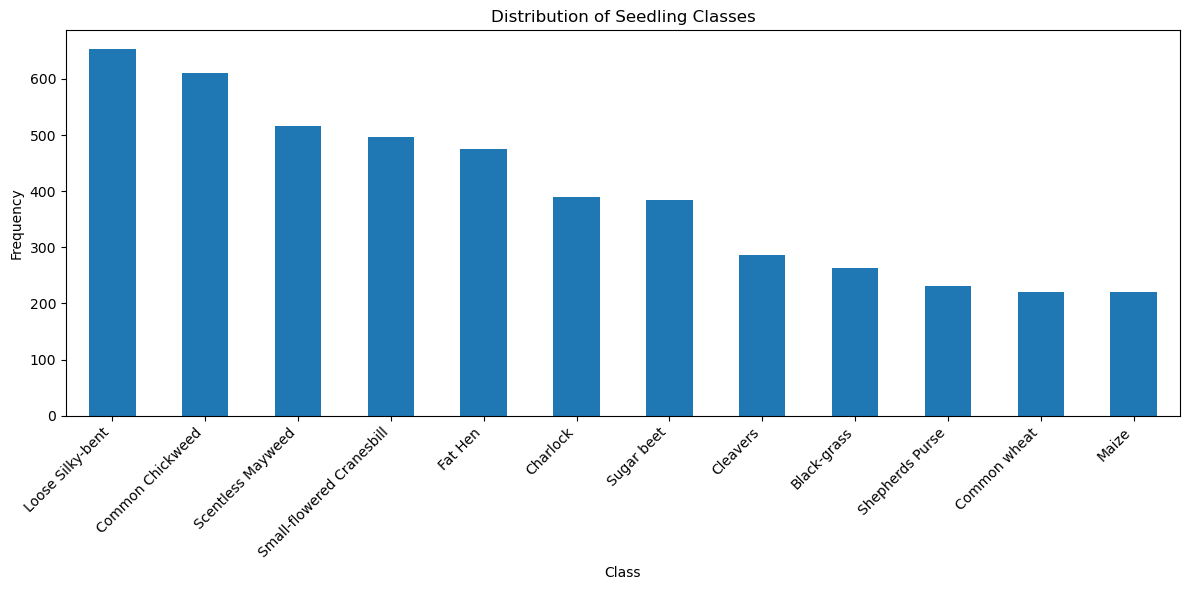

In [3]:

# -------------------------------
# 2. Exploratory Data Analysis
# -------------------------------

# a. Class distribution visualization
plt.figure(figsize=(12,6))
labels_df['Label'].value_counts().plot(kind='bar')
plt.title("Distribution of Seedling Classes")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


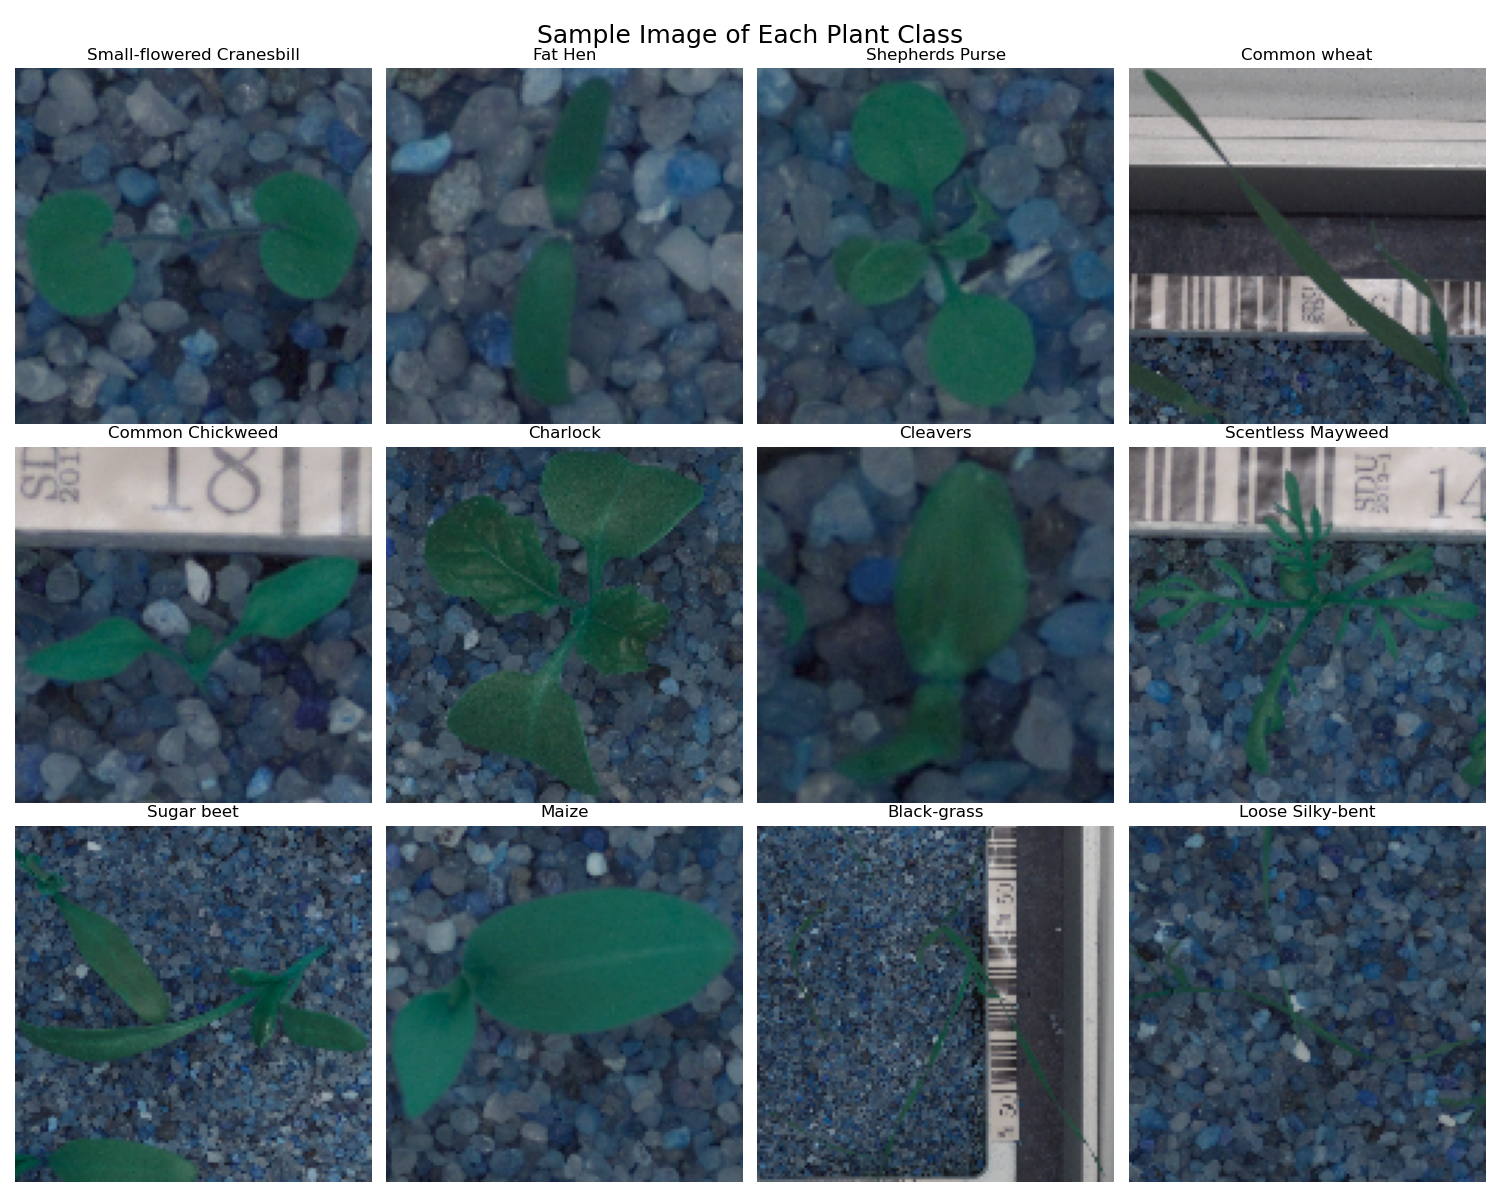

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import io, base64
from IPython.display import HTML

# Define helper to embed alt text in the exported HTML
def display_plot_with_alt(fig, alt_text):
    buf = io.BytesIO()
    fig.savefig(buf, format='png')
    buf.seek(0)
    encoded = base64.b64encode(buf.read()).decode('utf-8')
    html = f'<img src="data:image/png;base64,{encoded}" alt="{alt_text}"/>'
    return HTML(html)

# Get unique classes
unique_classes = labels_df['Label'].unique()

# Plot one image per class
fig = plt.figure(figsize=(15, 12))
for i, label in enumerate(unique_classes):
    img_index = labels_df[labels_df['Label'] == label].index[0]
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[img_index])
    plt.title(label)
    plt.axis('off')

plt.suptitle("Sample Image of Each Plant Class", fontsize=18)
plt.tight_layout()
plt.close(fig)  # Prevent double rendering

# Add alt text
display_plot_with_alt(fig, "One example image of each seedling plant class")




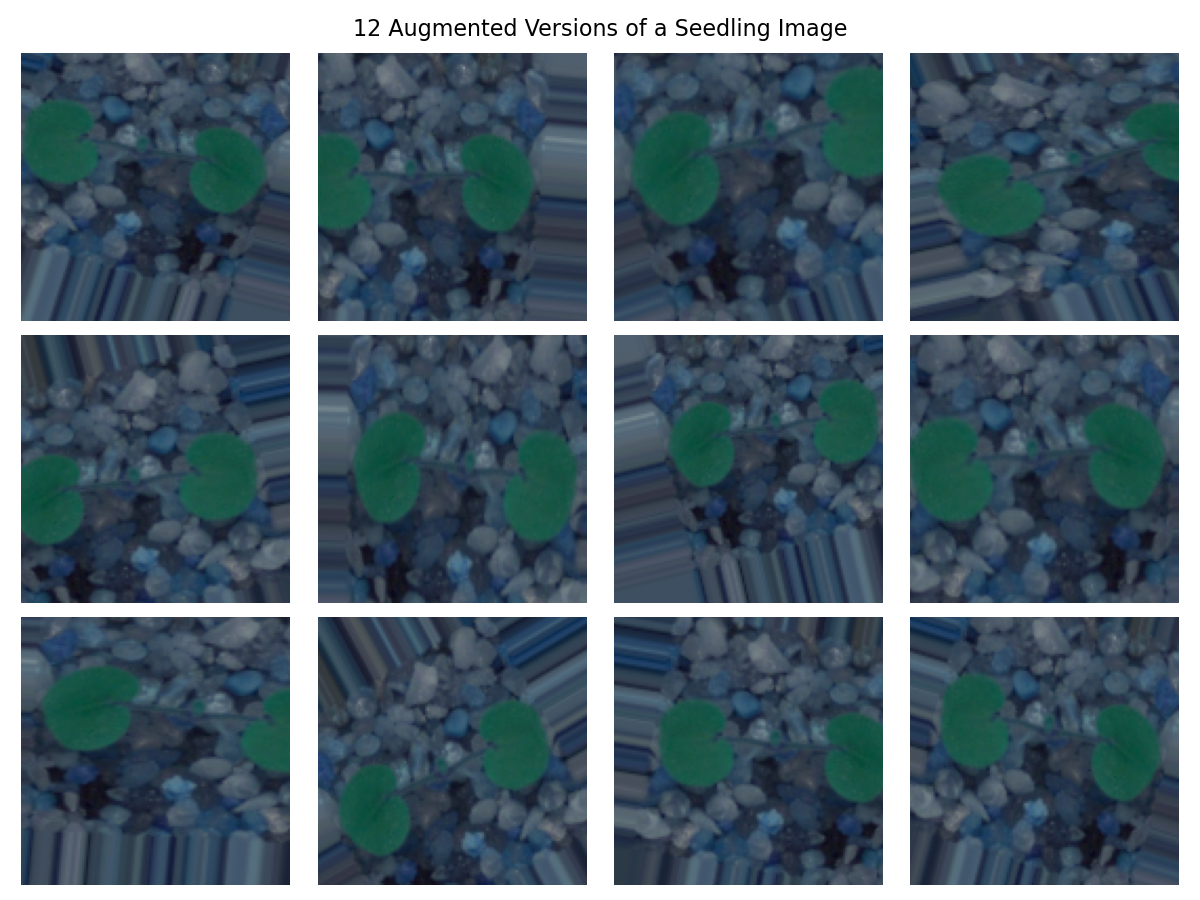

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import io, base64
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Function to display image with alt text
def display_plot_with_alt(fig, alt_text):
    buf = io.BytesIO()
    fig.savefig(buf, format='png')
    buf.seek(0)
    encoded = base64.b64encode(buf.read()).decode('utf-8')
    html = f'<img src="data:image/png;base64,{encoded}" alt="{alt_text}"/>'
    return HTML(html)

# Data augmentation configuration
augmenter = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Prepare sample image
sample_image = images[0].astype('uint8')
sample_image = np.expand_dims(sample_image, axis=0)

# Display 12 augmented images
fig = plt.figure(figsize=(12, 9))
for i, augmented in enumerate(augmenter.flow(sample_image, batch_size=1)):
    if i == 12:
        break
    plt.subplot(3, 4, i + 1)
    plt.imshow(augmented[0].astype('uint8'))
    plt.axis('off')

plt.suptitle("12 Augmented Versions of a Seedling Image", fontsize=16)
plt.tight_layout()
plt.close(fig)  # Prevent double render in notebook

# Display with alt text
display_plot_with_alt(fig, "Twelve augmented versions of a seedling image")


In [6]:
# -------------------------------
# 4. Train-Validation-Test Split
# -------------------------------

# Step 1: Extract original string labels
labels = labels_df['Label']

# Step 2: Encode string labels to integers
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Step 3: Split the data
X_train, X_temp, y_train_encoded, y_temp_encoded = train_test_split(images, labels_encoded, test_size=0.3, random_state=42, stratify=labels_encoded)
X_val, X_test, y_val_encoded, y_test_encoded = train_test_split(X_temp, y_temp_encoded, test_size=0.5, random_state=42, stratify=y_temp_encoded)


In [7]:
# -------------------------------
# 5. Normalize Images
# -------------------------------
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0


In [8]:
# -------------------------------
# 6. Encode Labels (One-Hot Encoding)
# -------------------------------
y_train_enc = to_categorical(y_train_encoded)
y_val_enc = to_categorical(y_val_encoded)
y_test_enc = to_categorical(y_test_encoded)




In [9]:
# -------------------------------
# 7. Save Prepared Datasets
# -------------------------------
np.save("X_train.npy", X_train)
np.save("X_val.npy", X_val)
np.save("X_test.npy", X_test)
np.save("y_train_enc.npy", y_train_enc)
np.save("y_val_enc.npy", y_val_enc)
np.save("y_test_enc.npy", y_test_enc)

print("✅ Data preparation complete. Files saved:")
print("- X_train.npy")
print("- X_val.npy")
print("- X_test.npy")
print("- y_train_enc.npy")
print("- y_val_enc.npy")
print("- y_test_enc.npy")


✅ Data preparation complete. Files saved:
- X_train.npy
- X_val.npy
- X_test.npy
- y_train_enc.npy
- y_val_enc.npy
- y_test_enc.npy


In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(labels)

LabelEncoder()

In [11]:
#Inspecting encoding, checking data distribution as part of troubleshooting the low accuracy problem
# View label mappings
print("Classes:", label_encoder.classes_)

# View raw test set label counts
print("Raw y_test values:", np.unique(y_test_encoded, return_counts=True))

# View full label distribution
print("Label distribution:")
print(labels.value_counts())

Classes: ['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']
Raw y_test values: (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]), array([39, 58, 43, 92, 33, 72, 98, 33, 78, 34, 75, 58], dtype=int64))
Label distribution:
Label
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: count, dtype: int64


In [12]:
#Define the neural network model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

#Compiling the model and optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

C:\Users\marri\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │         1,548 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,393,868 (28.21 MB)

 Trainable params: 7,393,868 (28.21 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
#Defining early stopping and patience parameter
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#Computing class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labels_encoded),
    y=labels_encoded
)
class_weights_dict = dict(enumerate(class_weights))

#Training the model with class weights
history = model.fit(
    X_train, y_train_enc,
    validation_data=(X_val, y_val_enc),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    class_weight=class_weights_dict
)


Epoch 1/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.1407 - loss: 2.5846 - val_accuracy: 0.3680 - val_loss: 1.9195
Epoch 2/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.2938 - loss: 1.9244 - val_accuracy: 0.4831 - val_loss: 1.4679
Epoch 3/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.4245 - loss: 1.5830 - val_accuracy: 0.5506 - val_loss: 1.3100
Epoch 4/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - accuracy: 0.4751 - loss: 1.4471 - val_accuracy: 0.6236 - val_loss: 1.2011
Epoch 5/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - accuracy: 0.5479 - loss: 1.2550 - val_accuracy: 0.6236 - val_loss: 1.1278
Epoch 6/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.5880 - loss: 1.1520 - val_accuracy: 0.6713 - val_loss: 1.0018
Epoch 7/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.6242 - loss: 1.0386 - val_accuracy: 0.6854 - val_loss: 0.9585
Epoch 8/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - accuracy: 0.6439 - loss: 0.9547 - val_accu

In [17]:
#Accuracy test calcuation
test_loss, test_acc = model.evaluate(X_test, y_test_enc)
print(f"Test Accuracy: {test_acc:.4f}")


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6898 - loss: 1.0739
Test Accuracy: 0.6942


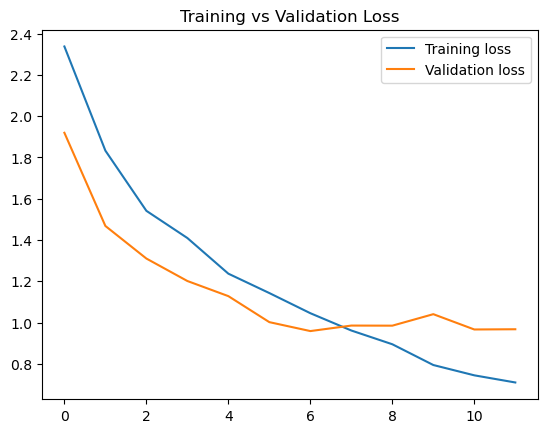

In [18]:
#Plot comparing training loss to validation loss
#Plot comparing training loss to validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


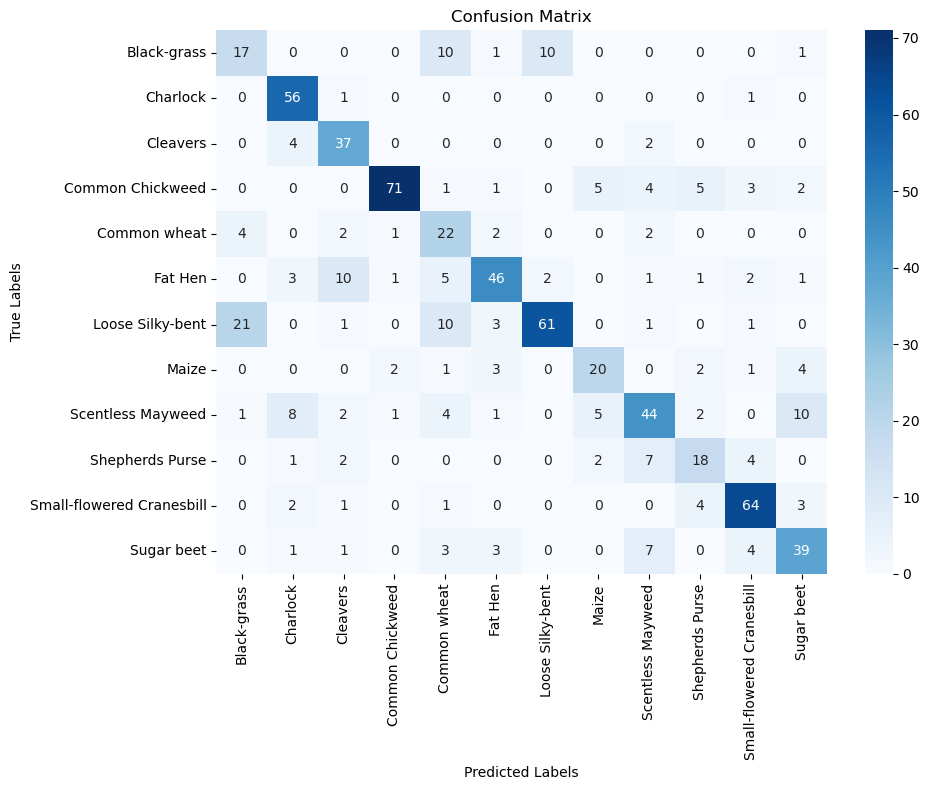

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: y_test_encoded is already in encoded form
y_test_labels = y_test_encoded

# Step 2: Predict class indices from the model
y_pred = np.argmax(model.predict(X_test), axis=1)

# Step 3: Generate confusion matrix
cm = confusion_matrix(y_test_labels, y_pred)

# Step 4: Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

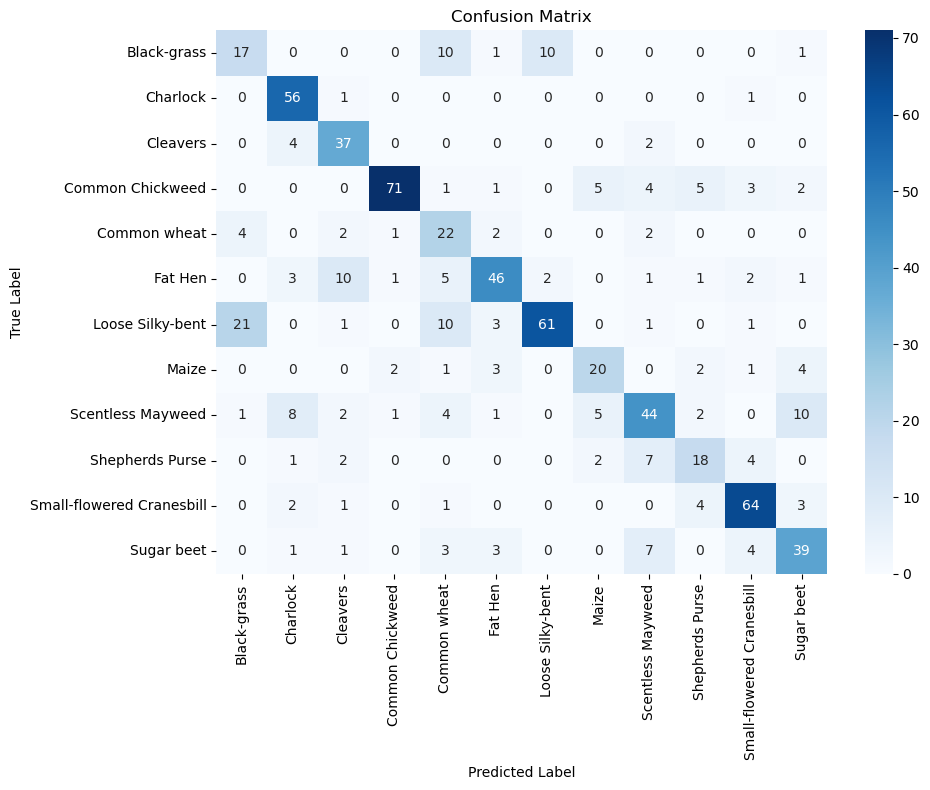

In [29]:
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

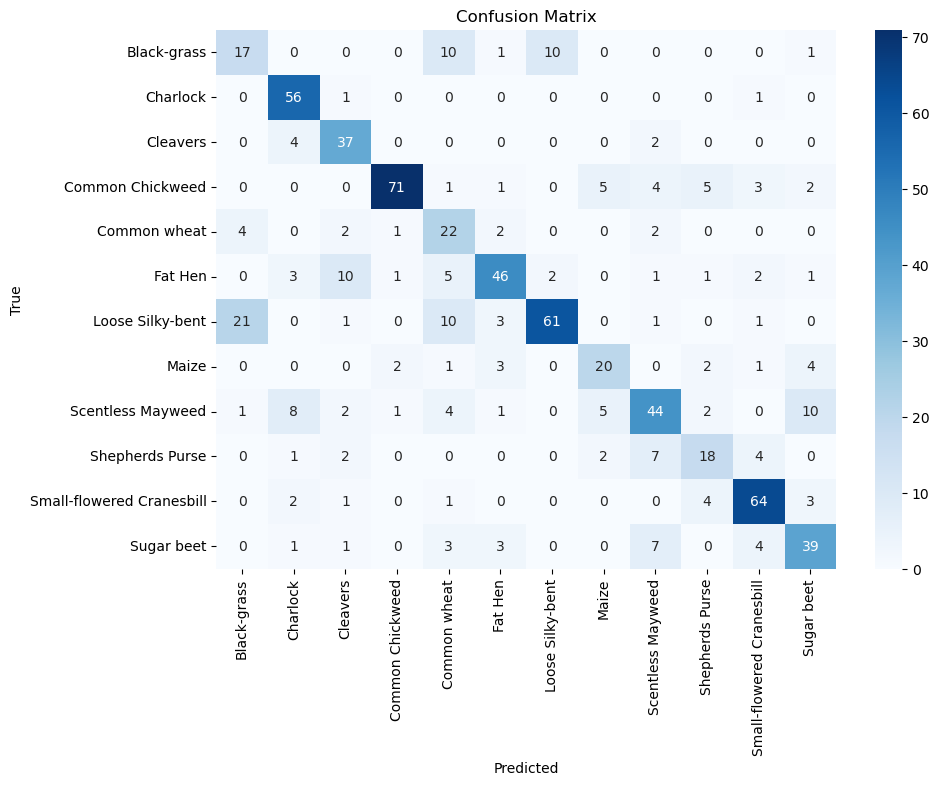

In [30]:
#Creating a bigger heatmap confsion matrix with specific labels
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [37]:
# Save the trained model to an HDF5 file
model.save("plant_classifier_model.keras")



In [39]:
!jupyter nbconvert --to html "D604_Task1.ipynb" --output "Plant_Classifier_Model.html"




[NbConvertApp] Converting notebook D604_Task1.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 4780211 bytes to Plant_Classifier_Model.html
